<a href="https://colab.research.google.com/github/smayd01/ml_sirius/blob/main/Homework_LinearRegression_CrossVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Today's data

400 fotos of human faces. Each face is a 2d array [64x64] of pixel brightness.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

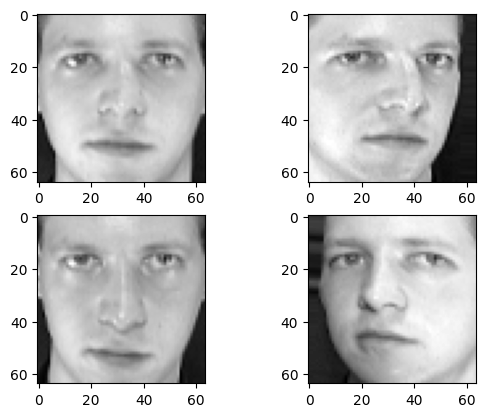

In [ ]:
# this code showcases matplotlib subplots. The syntax is: plt.subplot(height, width, index_starting_from_1)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# Face reconstruction problem

Let's solve the face reconstruction problem: given left halves of facex __(X)__, our algorithm shall predict the right half __(y)__. Our first step is to slice the photos into X and y using slices.

__Slices in numpy:__
* In regular python, slice looks roughly like this: `a[2:5]` _(select elements from 2 to 5)_
* Numpy allows you to slice N-dimensional arrays along each dimension: [image_index, height, width]
  * `data[:10]` - Select first 10 images
  * `data[:, :10]` - For all images, select a horizontal stripe 10 pixels high at the top of the image
  * `data[10:20, :, -25:-15]` - Take images [10, 11, ..., 19], for each image select a _vetrical stripe_ of width 10 pixels, 15 pixels away from the _right_ side.

__Your task:__

Let's use slices to select all __left image halves as X__ and all __right halves as y__.

In [ ]:
data.shape

(400, 64, 64)

In [ ]:
# select left half of each face as X, right half as Y
X = data[:, :, :32]
y = data[:, :, 32:]

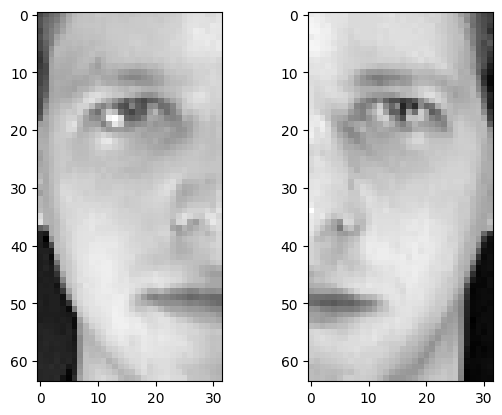

In [ ]:
# If you did everything right, you're gonna see left half-image and right half-image drawn separately in natural order
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

assert X.shape == y.shape == (len(data), 64, 32), "Please slice exactly the left half-face to X and right half-face to Y"

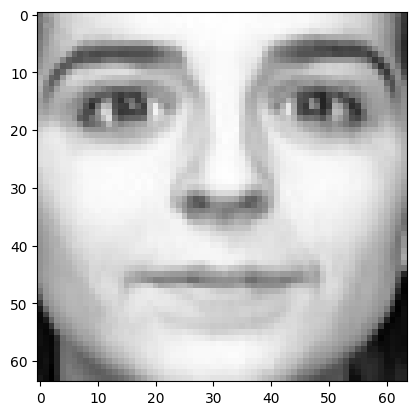

In [ ]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)


# if you did everything right, you're gonna see a valid face
plt.imshow(glue(X, y)[99], cmap='gray')

# Linear regression

Split __X__ and __y__ randomly into train and test. Use 95% of the objects for train and the rest 5% for test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
            train_test_split(X.reshape(X.shape[0], -1),
                             y.reshape(X.shape[0], -1),
                             test_size=0.05, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380, 2048) (380, 2048)
(20, 2048) (20, 2048)


Learn Linear Regression on train data. Use `LinearRegression` from `sklearn.linear_model`

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Compute measure mean squared error on train and test samples. Use `mean_squared_error` from `sklearn.metrics`

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, linear.predict(X_train))
mse_test = mean_squared_error(y_test, linear.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 7.6754336e-13
Test MSE: 0.012688551


## Why train error is much smaller than test?

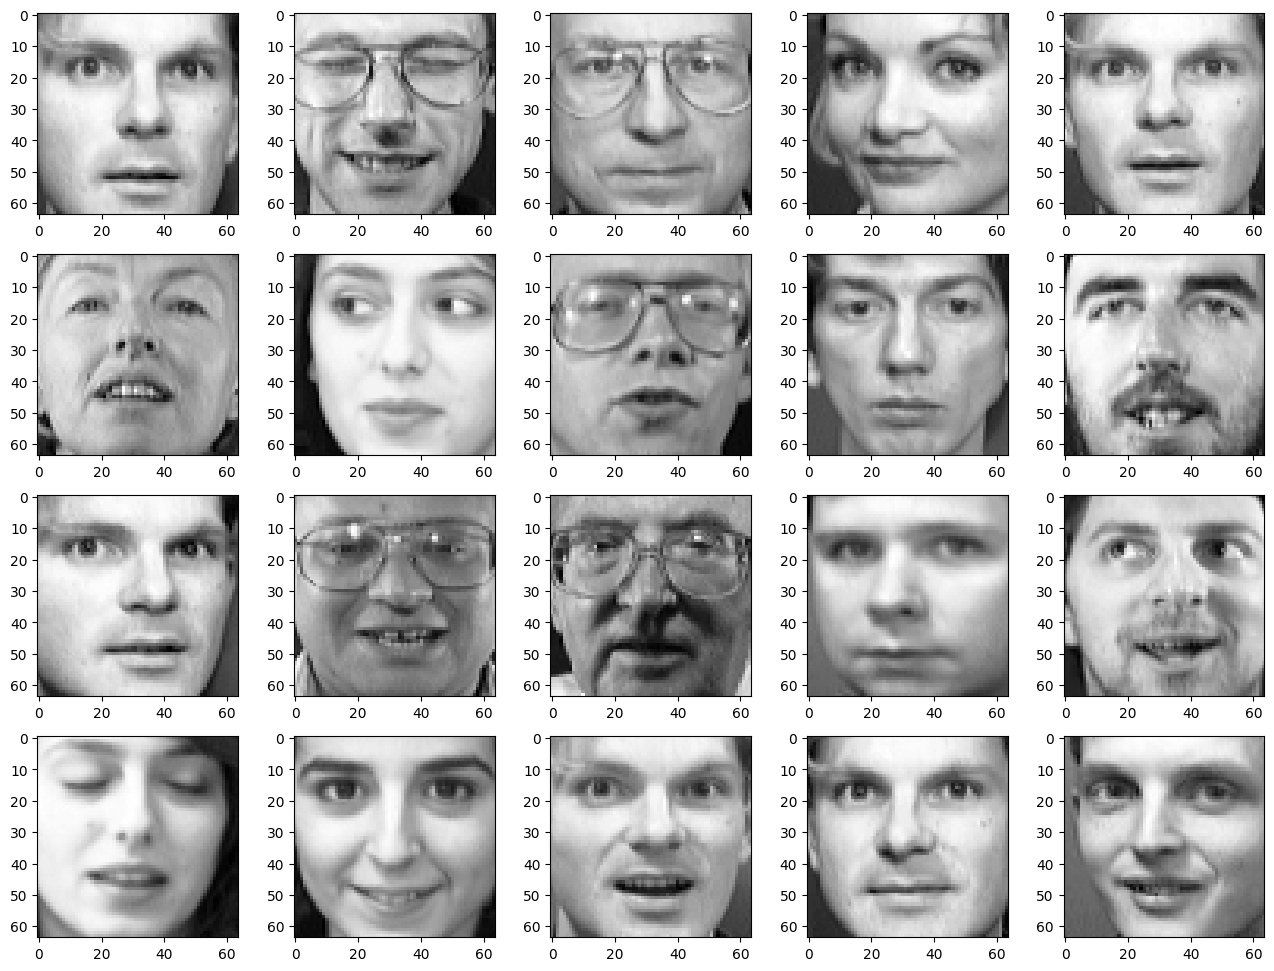

In [ ]:
# Train predictions
pics = glue(X_train, linear.predict(X_train)) # reconstruct and glue together X and predicted Y for the train dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

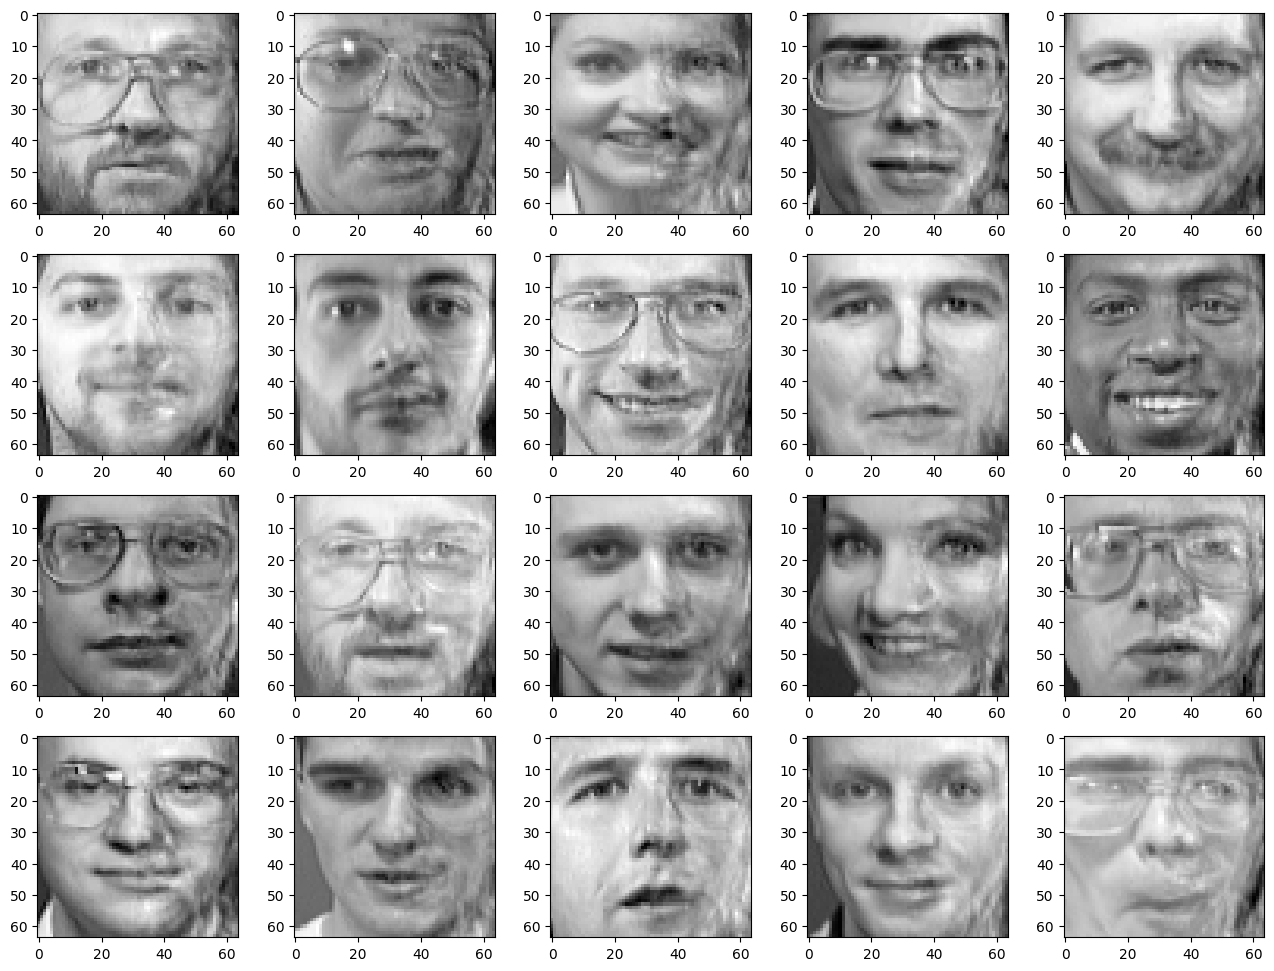

In [ ]:
# Test predictions
pics = glue(X_test, linear.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

### Regularisation

There are  many linear models in sklearn package, and all of them can be found [here](https://scikit-learn.org/stable/modules/linear_model.html). We will focus on 3 of them: Ridge regression, Lasso and ElasticNet.
Idea of all of them is very simple: add some penalty to the objective loss function to prevent overfitting.

# Ridge regression
RidgeRegression is just a LinearRegression, with l2 regularization - penalized for $ \alpha \cdot \sum _i w_i^2$

Let's train such a model with alpha=0.5

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)

ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
mse_train = mean_squared_error(y_train, ridge.predict(X_train))
mse_test = mean_squared_error(y_test, ridge.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.00043098984
Test MSE: 0.00995077


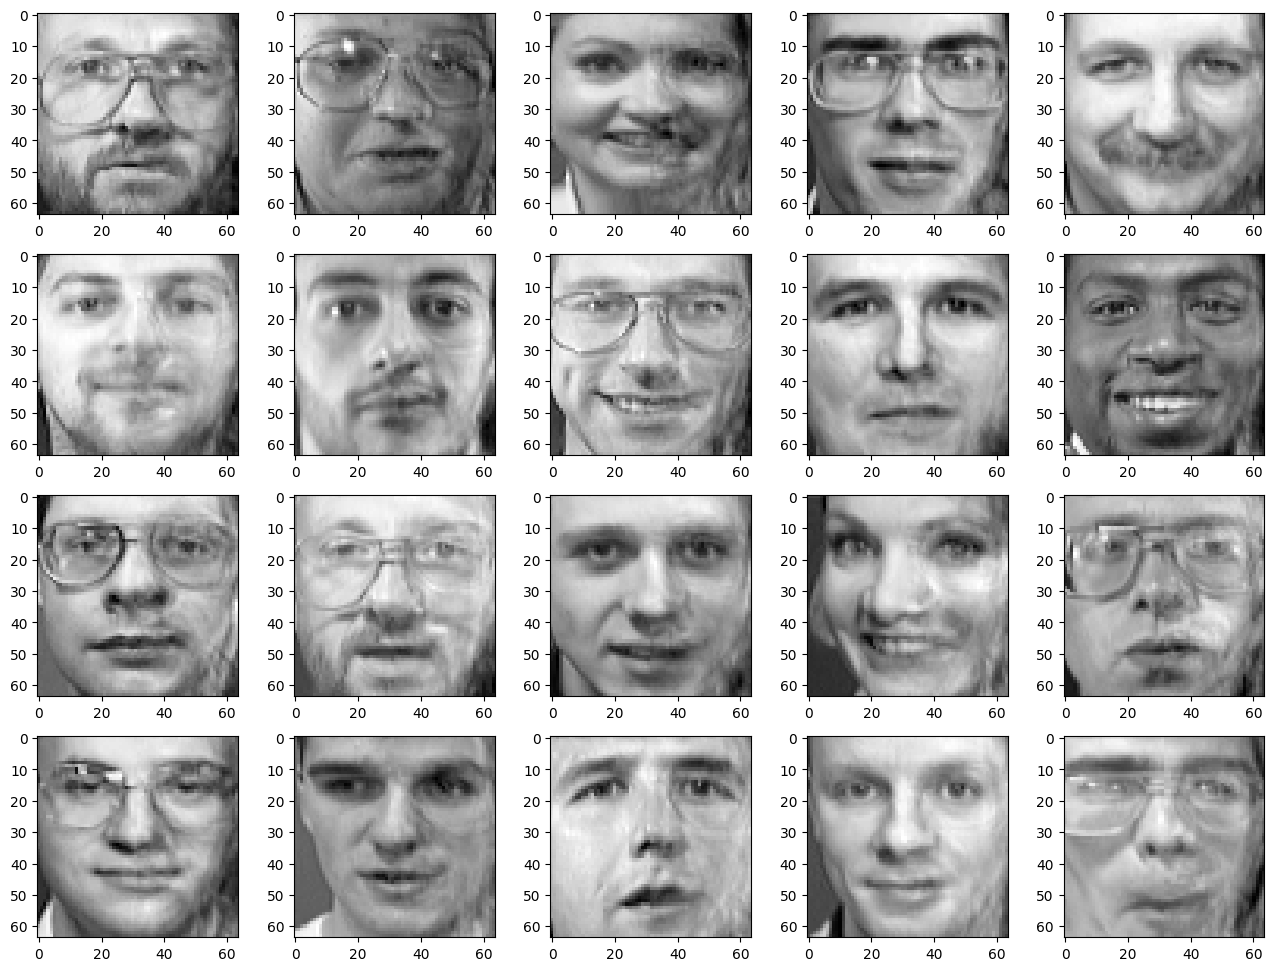

In [ ]:
# Test predictions
pics = glue(X_test, ridge.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

# Lasso regression

Try to use `Lasso` Regression. Try to choose reasonable `alpha`

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameter_dict = {
    'alpha': np.exp(np.linspace(-5,5,10))
}

gscv = GridSearchCV(estimator=Lasso(),param_grid=parameter_dict, scoring='neg_mean_squared_error', cv=3, verbose=100)

gscv.fit(X_train, y_train)

alpha = gscv.best_params_['alpha']

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START alpha=0.006737946999085467.................................
[CV 1/3; 1/10] END .alpha=0.006737946999085467;, score=-0.016 total time=  23.4s
[CV 2/3; 1/10] START alpha=0.006737946999085467.................................
[CV 2/3; 1/10] END .alpha=0.006737946999085467;, score=-0.014 total time=  22.4s
[CV 3/3; 1/10] START alpha=0.006737946999085467.................................
[CV 3/3; 1/10] END .alpha=0.006737946999085467;, score=-0.014 total time=  24.6s
[CV 1/3; 2/10] START alpha=0.020468075714350484.................................
[CV 1/3; 2/10] END .alpha=0.020468075714350484;, score=-0.021 total time=   1.7s
[CV 2/3; 2/10] START alpha=0.020468075714350484.................................
[CV 2/3; 2/10] END .alpha=0.020468075714350484;, score=-0.019 total time=   2.5s
[CV 3/3; 2/10] START alpha=0.020468075714350484.................................
[CV 3/3; 2/10] END .alpha=0.020468075714350484;,

Lasso(alpha=0.006737946999085467)

In [ ]:
mse_train = mean_squared_error(y_train, lasso.predict(X_train))
mse_test = mean_squared_error(y_test, lasso.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.014094103
Test MSE: 0.014075004


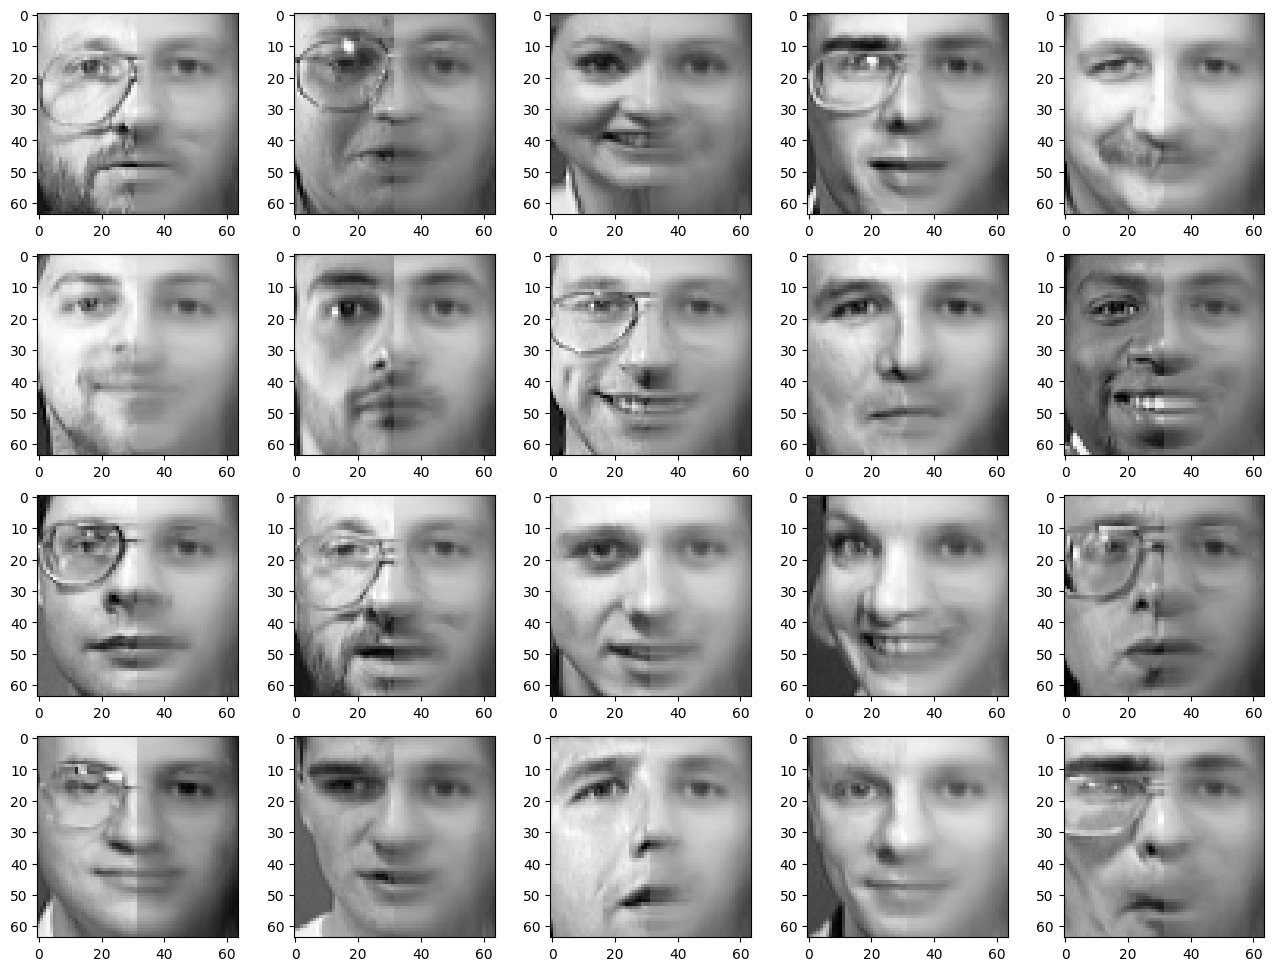

In [ ]:
# Test predictions
pics = glue(X_test, lasso.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

In [ ]:
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

In [ ]:
alpha = 0.5
loo = LeaveOneOut()

loss_values = []

for train_ids, val_ids in tqdm(loo.split(X_train),
                               total=loo.get_n_splits(X_train)):
    curr_X_train = X_train[train_ids]
    curr_y_train = y_train[train_ids]

    curr_X_val = X_train[val_ids]
    curr_y_val = y_train[val_ids]

    ridge = Ridge(alpha=alpha)
    ridge.fit(curr_X_train, curr_y_train)

    y_pred = ridge.predict(curr_X_val)
    curr_loss = mean_squared_error(curr_y_val, y_pred)

    loss_values.append(curr_loss)

loss_values = np.array(loss_values)

100%|█████████████████████████████████████████| 380/380 [00:19<00:00, 19.04it/s]


In [ ]:
loss_values.mean()

0.009806348

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
def try_alpha(alpha):
    loss_values = []

    for train_ids, val_ids in kf.split(X_train):
        curr_X_train = X_train[train_ids]
        curr_y_train = y_train[train_ids]

        curr_X_val = X_train[val_ids]
        curr_y_val = y_train[val_ids]

        ridge = Ridge(alpha=alpha)
        ridge.fit(curr_X_train, curr_y_train)

        y_pred = ridge.predict(curr_X_val)
        curr_loss = mean_squared_error(curr_y_val, y_pred)

        loss_values.append(curr_loss)

    loss_values = np.array(loss_values)
    return loss_values.mean()

In [ ]:
try_alpha(0.5)

0.010177793

In [ ]:
alpha_list = np.exp(np.linspace(-7, 5, 100))

In [ ]:
results = []

for alpha in tqdm(alpha_list):
    loss = try_alpha(alpha)
    results.append((loss, alpha))

100%|█████████████████████████████████████████| 100/100 [00:19<00:00,  5.04it/s]


In [ ]:
results = np.array(results)

In [ ]:
results[np.argmin(results[:, 0])]

array([0.00823911, 8.09226843])

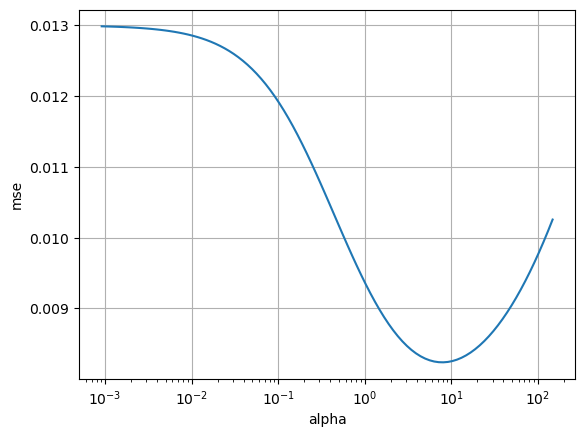

In [ ]:
plt.plot(results[:, 1], results[:, 0])
plt.xscale('log')

plt.xlabel('alpha')
plt.ylabel('mse')

plt.grid()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_dict = {
    'alpha': np.exp(np.linspace(-7, 5, 10))
}

gscv = GridSearchCV(estimator=Ridge(), param_grid=parameter_dict,
                    scoring='neg_mean_squared_error',
                    cv=5)

In [ ]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([9.11881966e-04, 3.45937734e-03, 1.31237287e-02, 4.97870684e-02,
       1.88875603e-01, 7.16531311e-01, 2.71828183e+00, 1.03122585e+01,
       3.91212840e+01, 1.48413159e+02])},
             scoring='neg_mean_squared_error')

In [ ]:
gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
gscv.best_params_

{'alpha': 10.312258501325752}

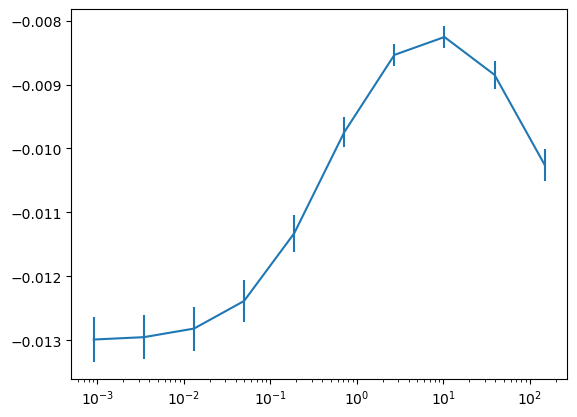

In [ ]:
plt.errorbar(x=parameter_dict['alpha'],
             y=gscv.cv_results_['mean_test_score'],
             yerr=gscv.cv_results_['std_test_score'] / gscv.cv**0.5)

plt.xscale('log')